In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Pendahuluan**

Image enhancement Adalah Langkah kedua dalam framework computer vision setelah Akuisisi image. Image enhancement bertujuan untuk memperbaiki kualitas citra sehingga dapat menghasilkan citra yang lebih baik, terutama untuk tujuan Analisa selanjutnya, baik deteksi, klasifikasi, recognisi, identifikasi maupun level 3D analisis.

Secara umum permasalahan citra, sesuai yang dibahas dalam kelas ada 7 yaitu

1.	Image terlalu gelap : ditandai pixel dominan ada di nilai pixel rendah. Dapat dilihat dari histogram

2.	Image terlalu terang: ditandai pixel dominan ada di nilai pixel tinggi. Dapat dilihat dari histogram.
Masalah 1 dan 2 dapat diperbaiki dengan menggunakan metode berbasis histogram equalization, seperti HE dan CLAHE

3.	Low contrast image: yaitu citra yang rentang nilai pixel terendah dan tertingginya terlalu sempit. Masalah ini bisa diperbaiki dengan contrast stretching atau memperlebar range pixel sehingga kontras dapat diperbaiki.

4.	Noisy Image: seperti salt and pepper noise, dapat diperbaiki dengan filter median

5.	Image blur: yaitu detailnya samar. Dapat diperbaiki dengan sharpening. Konsep sharpening Adalah dengan menambahkan detail/edge dengan citra awal. Edge didapatkan dengan Laplacian filter.

6.	Image terlalu tajam: dapat diperbaiki dengan image smoothing. Biasanya kita tidak menghendaki image terlalu tajam saat Analisa karena detail kecil yang sebenarnya tidak diperlukan akan menjadi terlihat tegas dan mempengaruhi hasil Analisa. Dalam prakteknya, biasanya untuk image sharpening biasanya juga membutuhkan smoothing dulu untuk menghilangkan detail2 kecil yang tidak diperlukan.

7.	Ukuran terlalu kecil: dapat dilakukan upsampling untuk meningkatkan ukuran citra (Nearest neighbour, bilinear, bicubic)

Dalam laporan kali ini, akan dilakukan image enhancement untuk masalah 1-5.


**Masalah low contrast**

Low contrast: rentang minimum dan maximum pixel terlalu pendek
Secara umum masalah low contrast dapat diselesaikan denngan contrast stretching

adapun dalam penyelesaian ini, ditunjukkan histogram equalization (HE) dan variannya mampu juga mengatasi masalah low contrast.
( seharusnya low contrast cukup dihandle dengan menggunakan contrast stretching, baik dengan menentukan nilai minimal ke maksimal kemudian digeser ke 0 sampai 255, atau dengan piece wiese (hanya sekala tertentu yg di expand). dari gambar tersebut juga dapat diketahui HE dan CLAHE walaupun secara umum digunakan untuk gambar terlalu gelap atau cerah, dapat juga digunakan untuk meningkatkan kontrast.)


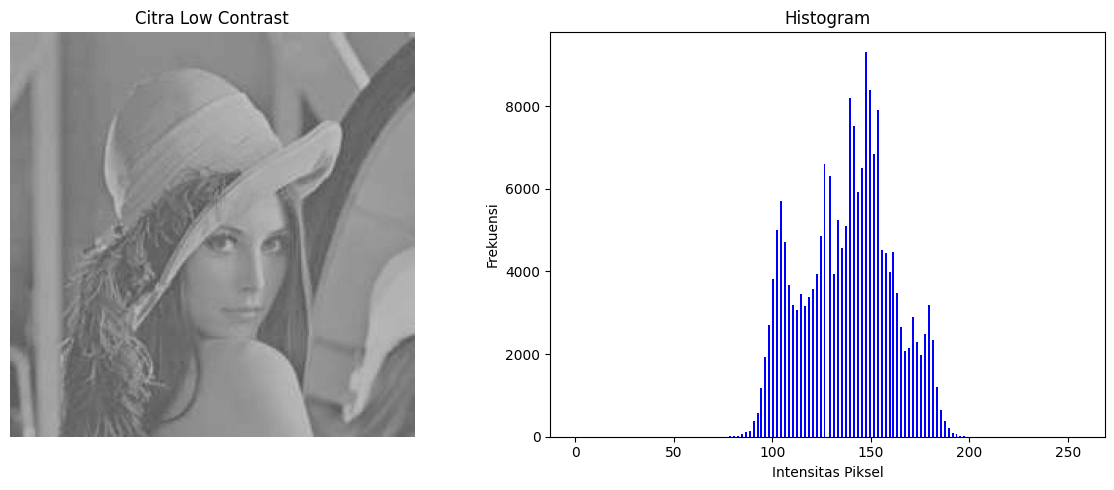

In [21]:
#load image rgb
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/low contrast 3.ppm'
try:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image at '{image_path}' not found or cannot be read.")
    else:
         # Tampilkan gambar
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title("Citra Low Contrast")

        # Hitung histogram
        plt.subplot(1,2,2)
        plt.hist(image.ravel(), bins=256, range=[0,256], color='blue')
        plt.title("Histogram")
        plt.xlabel("Intensitas Piksel")
        plt.ylabel("Frekuensi")

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

76 205


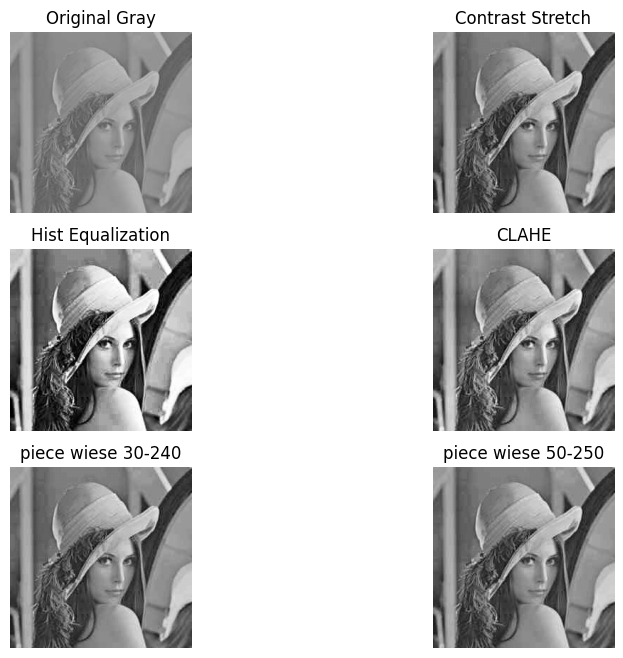

In [22]:
#ENHANCEMENT UNTUK LOW CONTRAST
import numpy as np
#konnversi ke grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
min_val, max_val = np.min(image_gray), np.max(image_gray)
print(min_val,max_val)
#strecth kan dengan contrast strecth, memastikam nilai dari minimal ke maximal 0-255
contrast_stretch = ((image_gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)

#dengan histogram equalization
histeq = cv2.equalizeHist(image_gray)

#clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image_gray)

# Piecewise stretching
def piecewise_stretch(img, a, b):
    imgf = img.astype(np.float32)

    scale = 255.0 / max(1, (b - a))
    mid = (imgf - a) * scale

    out = np.where((imgf >= a) & (imgf <= b), mid, imgf)
    # hanya stretch di dalam [a,b], di luar tetap pakai nilai asli

    return np.clip(out, 0, 255).astype(np.uint8)



hasil_ps1 = piecewise_stretch(image_gray,10,245)
hasil_ps2 = piecewise_stretch(image_gray,5,250)


# tampilkan sebelum & sesudah
titles = ['Original Gray', 'Contrast Stretch', 'Hist Equalization', 'CLAHE','piece wiese 30-240','piece wiese 50-250']
images = [image, contrast_stretch, histeq, clahe_img,hasil_ps1,hasil_ps2]

plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Pada citra Original Gray, tampilan terlihat kusam dengan detail yang kurang jelas karena kontrasnya rendah. Setelah dilakukan Contrast Stretching, gambar tampak lebih terang dan detail mulai terlihat, meskipun peningkatan kontrasnya masih merata secara global. Pada hasil Histogram Equalization (HE), kontras meningkat tajam sehingga detail wajah dan topi terlihat lebih jelas, namun ada bagian yang tampak terlalu terang atau terlalu gelap. Berbeda dengan itu, CLAHE mampu meningkatkan kontras secara lebih seimbang karena prosesnya dilakukan pada area kecil dengan pembatasan kontras, sehingga hasilnya terlihat lebih natural dan lembut. Sementara itu, metode Piecewise Contrast Stretching dengan rentang 30–240 maupun 50–250 menghasilkan perbaikan kontras yang lebih terkontrol pada area tertentu. Hasilnya tidak setajam HE, tetapi transisi antar piksel terlihat lebih halus. Dari semua metode, HE menghasilkan kontras paling tinggi, CLAHE memberikan tampilan yang lebih seimbang dan natural, sedangkan Piecewise Stretching memungkinkan pengaturan peningkatan kontras pada bagian intensitas tertentu.


**gambar terlalu gelap dan terang**

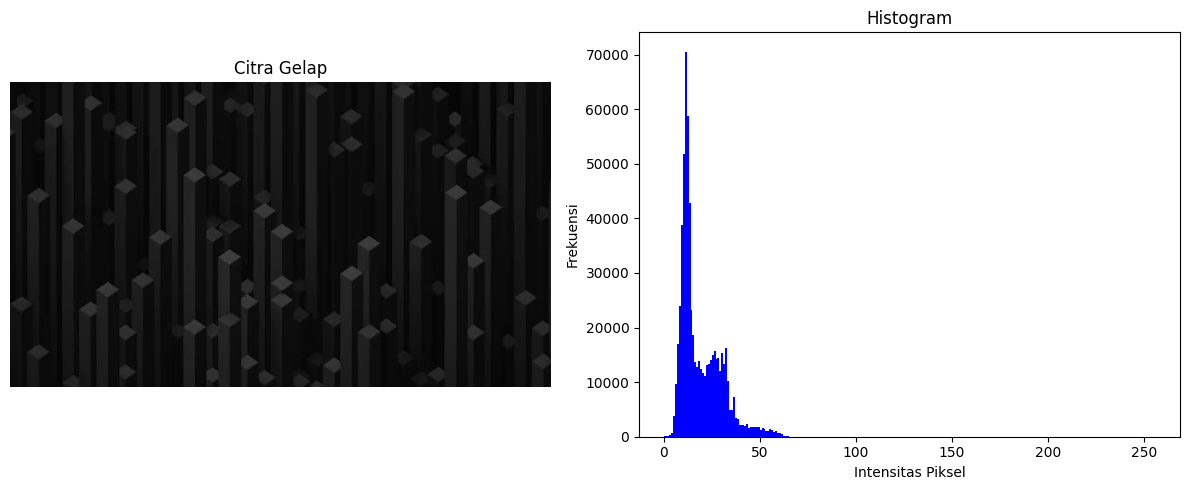

In [23]:
image_path_gelap = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/too dark.jpg'

try:
    image_gelap = cv2.imread(image_path_gelap)
    if image_gelap is None:
        print(f"Error: Image at '{image_path_gelap}' not found or cannot be read.")
    else:
         # Tampilkan gambar
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        plt.imshow(image_gelap, cmap='gray')
        plt.axis('off')
        plt.title("Citra Gelap")

        # Hitung histogram
        plt.subplot(1,2,2)
        plt.hist(image_gelap.ravel(), bins=256, range=[0,256], color='blue')
        plt.title("Histogram")
        plt.xlabel("Intensitas Piksel")
        plt.ylabel("Frekuensi")

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

nilai terendah dan tertinggi pada gambar gelap adalah  0 dan  71
nilai terendah dan tertinggi pada gambar HE adalah  0 dan  255
nilai terendah dan tertinggi pada gambar clahe adalah  0 dan  168


Visualisasi gambar sebelum dan setelah HE dan CLAHE


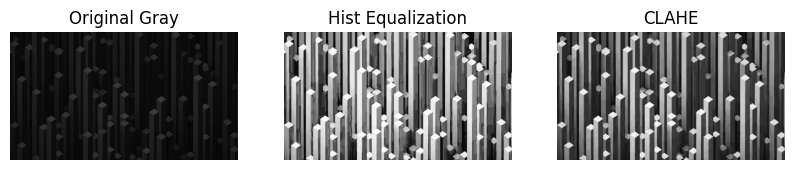

In [24]:
#ENHANCEMENT UNTUK terlalu gelap

image_gray_gelap = cv2.cvtColor(image_gelap, cv2.COLOR_BGR2GRAY)
min_val_gelap, max_val_gelap = np.min(image_gray_gelap), np.max(image_gray_gelap)
print("nilai terendah dan tertinggi pada gambar gelap adalah ",min_val_gelap,"dan ",max_val_gelap)

#dengan histogram equalization
histeq = cv2.equalizeHist(image_gray_gelap)

#clahe
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(2,2))
clahe_img = clahe.apply(image_gray_gelap)

min_val_terang_histeq, max_val_terang_histeq = np.min(histeq), np.max(histeq)
min_val_terang_clahe, max_val_terang_clahe = np.min(clahe_img), np.max(clahe_img)
min_val_terang_histeq, max_val_terang_histeq = np.min(histeq), np.max(histeq)
min_val_terang_clahe, max_val_terang_clahe = np.min(clahe_img), np.max(clahe_img)
print("nilai terendah dan tertinggi pada gambar HE adalah ",min_val_terang_histeq,"dan ", max_val_terang_histeq)
print("nilai terendah dan tertinggi pada gambar clahe adalah ",min_val_terang_clahe,"dan ", max_val_terang_clahe)


# tampilkan sebelum & sesudah
print("\n\nVisualisasi gambar sebelum dan setelah HE dan CLAHE")
titles = ['Original Gray', 'Hist Equalization', 'CLAHE']
images = [image_gelap,  histeq, clahe_img]

plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

terlihat dari gambar di atas, kalau minimum pixel 0 dan max hanya di 71. berarti ini sangat gelap. sehingga cocok didekati dengan AHE atau *CLAHE*

hasil image setelah HE menjadi lebih terang dibandingkan dengan citra awal. Begitu juga dengan hasil CLAHE. Akan tetapi kalua dibandingkan antara HE dan CLAHE, maka dapat dilihat bahwa citra hasil CLAHE lebih lembut transisi pixelnya. Hal ini disebabkan karena CLAHE memastikan rentang maksimal contrast tidak melebihi limit yang ditetapkan. Dalam program ini clip limit ditetapkan menjadi 4, berarti tidak boleh ada satu bin yang mempunya frequensi lebih dari 4 kali rata-rata frequensi bin yang lain. Selain itu, gridsize 2x2 memastikan bahwa proses histogram equalization dilakukan pada area local, yaitu citra dibagi menjadi 4 grid besar.

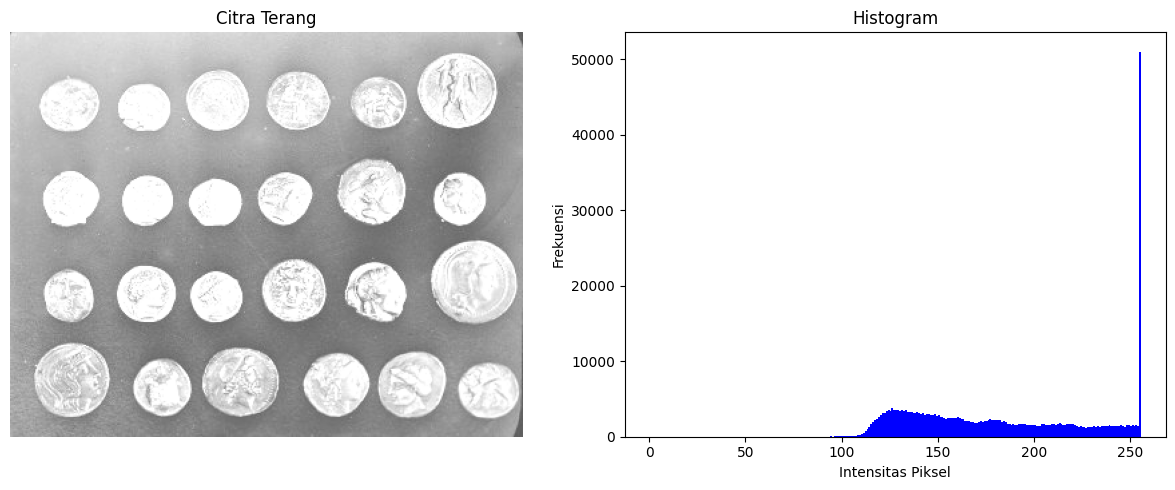

nilai terendah dan tertinggi pada gambar terang adalah  91 dan  255
nilai terendah dan tertinggi pada gambar terang HE adalah  0 dan  255
nilai terendah dan tertinggi pada gambar terang CLAHE adalah  26 dan  255


Visualisasi gambar sebelum dan setelah HE dan CLAHE


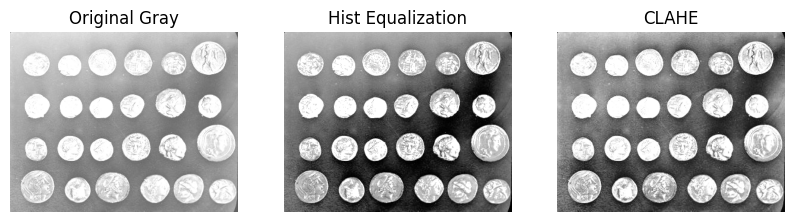

In [25]:
#ENHANCEMENT UNTUK terlalu cerah
image_path_terang = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/coins_gray_too_bright.png'
try:
    image_terang = cv2.imread(image_path_terang)
    if image_terang is None:
        print(f"Error: Image at '{image_path_terang}' not found or cannot be read.")
    else:
         # Tampilkan gambar
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        plt.imshow(image_terang, cmap='gray')
        plt.axis('off')
        plt.title("Citra Terang")

        # Hitung histogram
        plt.subplot(1,2,2)
        plt.hist(image_terang.ravel(), bins=256, range=[0,256], color='blue')
        plt.title("Histogram")
        plt.xlabel("Intensitas Piksel")
        plt.ylabel("Frekuensi")

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

image_gray_terang = cv2.cvtColor(image_terang, cv2.COLOR_BGR2GRAY)
min_val_terang, max_val_terang = np.min(image_gray_terang), np.max(image_gray_terang)
print("nilai terendah dan tertinggi pada gambar terang adalah ",min_val_terang,"dan ",max_val_terang)

#dengan histogram equalization
histeq = cv2.equalizeHist(image_gray_terang)

#clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
clahe_img = clahe.apply(image_gray_terang)
min_val_terang_histeq, max_val_terang_histeq = np.min(histeq), np.max(histeq)
min_val_terang_clahe, max_val_terang_clahe = np.min(clahe_img), np.max(clahe_img)
print("nilai terendah dan tertinggi pada gambar terang HE adalah ",min_val_terang_histeq,"dan ", max_val_terang_histeq)
print("nilai terendah dan tertinggi pada gambar terang CLAHE adalah ",min_val_terang_clahe,"dan ", max_val_terang_clahe)


# tampilkan sebelum & sesudah
print("\n\nVisualisasi gambar sebelum dan setelah HE dan CLAHE")
titles = ['Original Gray', 'Hist Equalization', 'CLAHE']
images = [image_terang,  histeq, clahe_img]

plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Citra yang terlalu terang mempunyai karakteristik terbalik dibandingkan citra terlalu gelap, yaitu mempunyai pixel yang dominan pada sisi kanan. treatment yang dilakukan juga sama

**IMAGE DENOISING DAN SHARPENING**
Dalam contoh kasus ini, saya memilih menggunakan citra blur noisy dengan salt and pepper noise. Treatment yang dilakukan yaitu dengan

a.	Membersihkan noise salt and pepper dengan median filter

b.	Melakukan sharpening dengan cara

-	Smoothing image
-	Sharpening dengan menjumlahkan image dengan edge/detail yang didapatkan dari Laplacian filter

Median filter dilakukan dengan ukuran filter 3x3. Semakin besar ukuran filter, noise makin hilang tapi beresiko menjadikan image menjadi semakin blur. Sementara konsep sharpening mengikuti rumus

***sharpened=denoised−α×Laplacian		1)***

Sebelum proses sharpening dilakukan, citra hasil denoising terlebih dahulu diproses dengan Gaussian Blur. Tahap ini berfungsi untuk mengurangi sensitivitas terhadap noise sehingga perhitungan tepi nantinya menjadi lebih stabil. Setelah itu, citra yang sudah di-blur diproses menggunakan Laplacian of Gaussian, yaitu operator turunan kedua yang menonjolkan detail tepi atau edge. Hasil dari Laplacian ini kemudian dikombinasikan dengan citra denoised menggunakan rumus 1), di mana nilai α mengatur tingkat ketajaman. Dengan cara ini, detail tepi diperkuat sehingga citra akhir tampak lebih tajam namun tetap bersih dari noise berlebih.




Visualisasi gambar sebelum dan setelah denoising dan sharpening


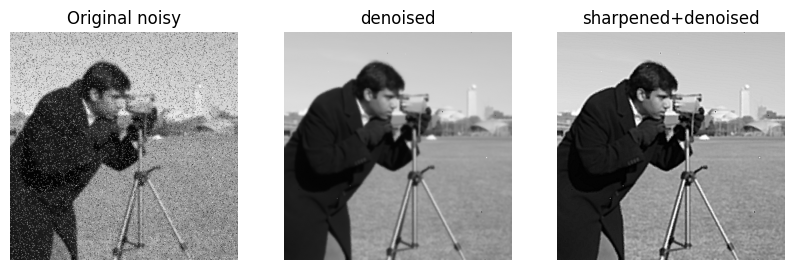

In [26]:
#path
image_path_noisy_blur = '/content/drive/MyDrive/~S3/VISION LANJUT/TUGAS/noisy_blur.png'
 #-------------- READ IMAGE --------------
img_blur = cv2.imread(image_path_noisy_blur, cv2.IMREAD_UNCHANGED)
if img_blur is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {image_path_noisy_blur}")

# Jika ada alpha (BGRA), buang alpha
if img_blur.ndim == 3 and img_blur.shape[2] == 4:
    img_blur  = cv2.cvtColor(img_blur, cv2.COLOR_BGRA2BGR)

# Pastikan tipe uint8 untuk tampilan/processing
if img_blur.dtype != np.uint8:
    img_blur = cv2.normalize(img_blur, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

is_gray = (img_blur.ndim == 2) or (img_blur.ndim == 3 and img_blur.shape[2] == 1)

# -------------- (2) NOISE REMOVAL --------------
# Median filter efektif untuk Salt & Pepper noise
# ksize bisa 3 atau 5 (semakin besar semakin bersih tapi bisa makin blur)
ksize = 3
denoised = cv2.medianBlur(img_blur, ksize)

# -------------- (3) SHARPENING : -------------
#Konsep Sharpening: sharp = den - α·Laplacian. sblm ny tp di smooth pakai gaussian -

# ---- Laplacian of Gaussian (kurangi sensitivitas noise) ----
sigma  = 1.0                           # 0.8–1.6
blur   = cv2.GaussianBlur(denoised, (0,0), sigma) #smoothing dl
lap16  = cv2.Laplacian(blur, cv2.CV_16S, ksize=3)  # ini edge detection/detail tepi

# sharpen = den - α * Laplacian(den)
alpha  = 0.9
sh16   = denoised.astype(np.int16) - (alpha * lap16)#sharpened= awal +detail nya
sharpened  = np.clip(sh16, 0, 255).astype(np.uint8)


# tampilkan sebelum & sesudah
print("\n\nVisualisasi gambar sebelum dan setelah denoising dan sharpening")
titles = ['Original noisy', 'denoised', 'sharpened+denoised']
images = [img_blur,  denoised, sharpened]
plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()



Pada gambar tersebut terlihat hasil denoising dan sharpening yang diterapkan pada citra noisy. Awalnya, citra Original noisy dipenuhi dengan bintik hitam putih khas salt & pepper noise sehingga detail objek menjadi kurang jelas. Setelah diproses dengan median filter (denoised), noise berhasil dikurangi sehingga gambar terlihat lebih bersih, meskipun detailnya sedikit berkurang. Tahap berikutnya adalah sharpening dengan metode Laplacian of Gaussian yang bertujuan menonjolkan tepi dan detail. Hasil akhir (sharpened + denoised) memperlihatkan citra yang lebih tajam dibanding hasil denoised saja, sehingga detail orang dan kamera tampak lebih jelas tanpa gangguan noise yang berlebihan.

**Kesimpulan**

Dari serangkaian percobaan yang dilakukan, bisa dilihat bahwa setiap permasalahan citra punya solusi peningkatannya masing-masing. HE dan CLAHE cukup ampuh memperbaiki citra yang terlalu gelap maupun terlalu terang, dengan CLAHE memberi hasil yang lebih lembut dan natural. Untuk citra berkontras rendah, contrast stretching dan variasinya berhasil membuat detail lebih jelas. Pada citra noisy, median filter mampu membersihkan bintik salt & pepper, lalu proses sharpening dengan Laplacian of Gaussian membantu menegaskan kembali detail yang sempat hilang. Secara keseluruhan, teknik-teknik image enhancement ini membuat gambar jauh lebih mudah dibaca dan dianalisis untuk tahap pengolahan berikutnya
